In [1]:
#%matplotlib inlin
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np
import random


In [2]:
#** code for plotting **

step_size = 10
start_color = np.array([0,0,255]) #blue
goal_color = np.array([0,255,0]) #green
fire_color = np.array([0,0,0])#black
neighbor_color = np.array([220,220,220])#gray
fringe_color = np.array([128,128,128])#yellow
explored_color = np.array([255,0,0])#red
node_color = np.array([255,165,0])#orange

def plot_fire(fire_matrix, dim):
    fig = plt.figure()

    prob_map = np.zeros((step_size*dim,step_size*dim,3)).astype(int) + 255
    # add grid
    prob_map[step_size-1::step_size,:,:] = 0
    prob_map[:,step_size-1::step_size,:] = 0


    prob_map[0:step_size-1,:step_size-1] = start_color
    prob_map[step_size*(dim-1):step_size*(dim-1)+step_size-1,step_size*(dim-1):step_size*(dim-1)+step_size-1] = goal_color
    plt.xticks([], [])
    plt.yticks([], [])
    
    for i in range(dim):
        for j in range(dim):
            if fire_matrix[i][j] == 1:
                prob_map[step_size*i:step_size*i + step_size-1, step_size*j:step_size*j + step_size-1] = fire_color
    plt.imshow(prob_map)
    
def node_plot(prob_map, node, color, alpha=1.0):
    prob_map[node[0]*step_size:node[0]*step_size+step_size-1,node[1]*step_size:node[1]*step_size+step_size-1] = color*alpha

def step_plot(node, neighbors, fringe, explored, dim, fire_matrix):
    # plot given the info as listed 
    #fig = plt.figure()
    prob_map = np.zeros((step_size*dim,step_size*dim,3)).astype(int) + 255
    # add grid
    prob_map[step_size-1::step_size,:,:] = 0
    prob_map[:,step_size-1::step_size,:] = 0


    prob_map[0:step_size-1,:step_size-1] = start_color
    prob_map[step_size*(dim-1):step_size*(dim-1)+step_size-1,step_size*(dim-1):step_size*(dim-1)+step_size-1] = goal_color
    
    for i in range(dim):
        for j in range(dim):
            if fire_matrix[i][j] == 1:
                prob_map[step_size*i:step_size*i + step_size-1, step_size*j:step_size*j + step_size-1] = fire_color
    
    
    # plot transitioned neighbors
    for next_node in neighbors:
        if next_node in fire_set:
            continue
        node_plot(prob_map, next_node, neighbor_color)
        
    
    # plot fringe
    for f_node in fringe:
        if next_node in fire_set:
            continue
        node_plot(prob_map, f_node, fringe_color)
    # plot explored
    for e_node in explored:
        node_plot(prob_map, e_node, explored_color)

    # plot current node
    node_plot(prob_map, node, node_color)

    plt.xticks([], [])
    plt.yticks([], [])

    img = plt.imshow(prob_map, animated=True)
    return img
    
    
def path_plot(path, dim, fire_matrix):
    # plot given the info as listed 
    #fig = plt.figure()
    prob_map = np.zeros((step_size*dim,step_size*dim,3)).astype(int) + 255
    # add grid
    prob_map[step_size-1::step_size,:,:] = 0
    prob_map[:,step_size-1::step_size,:] = 0
    
    for i in range(dim):
        for j in range(dim):
            if fire_matrix[i][j] == 1:
                prob_map[step_size*i:step_size*i + step_size-1, step_size*j:step_size*j + step_size-1] = fire_color

    for i in range(len(path)):
        node = path[i]
        node_plot(prob_map, node, node_color, alpha=i/len(path)+1.0)

    prob_map[0:step_size-1,:step_size-1] = start_color
    prob_map[step_size*(dim-1):step_size*(dim-1)+step_size-1,step_size*(dim-1):step_size*(dim-1)+step_size-1] = goal_color


    plt.xticks([], [])
    plt.yticks([], [])

    img = plt.imshow(prob_map)
    return img

Enter dimension of maze: 10
Enter probability of fire: 0.2
10
0.2


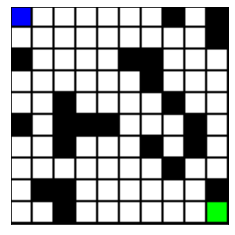

In [3]:
#take input from user
dim = int(input("Enter dimension of maze: "))
p = float(input("Enter probability of fire: "))

print(dim)
print(p)

fire_matrix = [ [ 0 for i in range(dim) ] for j in range(dim) ] 
fire_set = set([])
for i in range(dim):
    for j in range(dim):
        if i == 0 and j == 0 or i == dim-1 and j == dim-1:
            continue
        if random.uniform(0,1) < p:
            fire_matrix[i][j] = 1
            fire_set.add((i,j))
            
plot_fire(fire_matrix, dim)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


You have found the goal
20


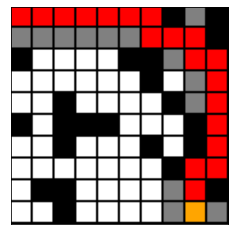

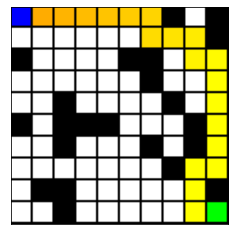

In [4]:
#DFS search
transitions = [(0,-1),(-1,0),(0,1),(1,0)]
start = (0,0)
goal = (dim-1, dim-1)
explored_spaces = set([])
fringe = [start]
imgs = []
fig = plt.figure()

parent_map = [[(0,0) for i in range(dim)] for i in range(dim)]
parent_fringe = [(-1,-1)]

while len(fringe) > 0:
    node = fringe.pop(-1)
    
    if node in explored_spaces:
        continue
    if node in fire_set:
        continue
    
    parent = parent_fringe.pop(-1)
    parent_map[node[0]][node[1]] = parent
    
    if node[0] == goal[0] and node[1] == goal[1]:
        print("You have found the goal")
        break
        
    neighbors = []
    parents = []
    
    for i in range(len(transitions)):
        horizontal, vertical = transitions[i]
        
        x = node[0] + vertical
        y = node[1] + horizontal
        
        if x < 0 or y < 0 or x > dim-1 or y > dim-1:
            continue
        if (x,y) in explored_spaces:
            continue
        if (x,y) in fire_set:
            continue
        if (x,y) not in fringe:
            neighbors.append((x,y))
        parents.append(node)
    
    fringe += neighbors
    parent_fringe += parents
    
    img = step_plot(node, neighbors, fringe, explored_spaces, dim, fire_matrix)
    imgs.append([img])
    
    explored_spaces.add(node)
    
print(len(imgs))
    
ani = animation.ArtistAnimation(fig, imgs, interval=400, blit=True,
                                repeat_delay=2000)


# find the path from bookkeeping

# plot the path
path_fig = plt.figure()
path = []
node = (dim-1,dim-1)
while True:
    path.append(node)
    node = parent_map[node[0]][node[1]]
    if node[0] == -1:
        break
path = path[::-1]
path_plot(path, dim, fire_matrix)

HTML(ani.to_html5_video())



    